In [2]:
import pandas as pd

melt_df = pd.read_csv("../input_csv/melt_df.csv")
redefined_df = pd.read_csv("../input_csv/redefined_df.csv")

In [3]:
redefined_df.head()

,자치구,상권_코드,서비스_업종_코드_명,총_유동인구_수,총_상주인구_수,총_직장_인구_수,유사_업종_점포_수,집객시설수,교통시설수,당월_매출_금액,cluster,geometry,집객력(점수),매출액(점수),경쟁업체(점수),편의성(점수),잠재고객(점수)
0,관악구,1,PC방,4539089.50,9588,1580,7,0.0,0.0,1.133742e+09,0,POLYGON ((126.93440736942736 37.46765303321722...,1,5,5,1,4.333333
1,서초구,2,PC방,24375746.25,29235,182124,26,980.0,86.0,4.155200e+09,0,POLYGON ((127.02248523102622 37.49640898250913...,5,5,5,5,5.000000
2,광진구,3,PC방,2924851.00,4782,892,6,83.0,9.0,4.014410e+08,0,POLYGON ((127.06601812263857 37.54077443531351...,5,4,4,4,3.666667
3,노원구,4,PC방,4589353.75,899,1552,10,190.0,28.0,8.129638e+08,0,POLYGON ((127.06000553082049 37.65328168143866...,5,5,5,5,3.000000
4,강동구,5,PC방,1206108.50,2701,1884,7,75.0,7.0,2.512043e+08,0,"POLYGON ((127.1338115273121 37.52561490905559,...",5,3,5,4,3.000000


### 레이더 차트

In [4]:
dataset = redefined_df[(redefined_df['서비스_업종_코드_명'] == 'PC방') & (redefined_df['cluster'] == 0)][['경쟁업체(점수)', '매출액(점수)', '집객력(점수)', '편의성(점수)', '잠재고객(점수)']]

dataset = dataset.rename(columns = {'경쟁업체(점수)' : '경쟁업체',
                                   '매출액(점수)' : '매출액',
                                   '집객력(점수)' : '집객력',
                                   '편의성(점수)' : '편의성',
                                   '잠재고객(점수)' : '잠재고객'})

chart_df = pd.DataFrame(dataset.mean()).T

for j in ['경쟁업체', '매출액', '집객력', '편의성', '잠재고객']:
    if chart_df.loc[0,j] < 2:
        chart_df.loc[0,f'{j}(등급)'] = 'D'
    elif chart_df.loc[0,j] < 3:
        chart_df.loc[0,f'{j}(등급)'] = 'C'
    elif chart_df.loc[0,j] < 4:
        chart_df.loc[0,f'{j}(등급)'] = 'B'
    else :
        chart_df.loc[0,f'{j}(등급)'] = 'A'

chart_df_2 = chart_df.drop(columns=['매출액', '잠재고객', '집객력', '편의성', '경쟁업체']).melt()
chart_df = chart_df.drop(columns=['매출액(등급)', '잠재고객(등급)', '집객력(등급)', '편의성(등급)', '경쟁업체(등급)']).melt()

chart_df['grade'] = chart_df_2['value']

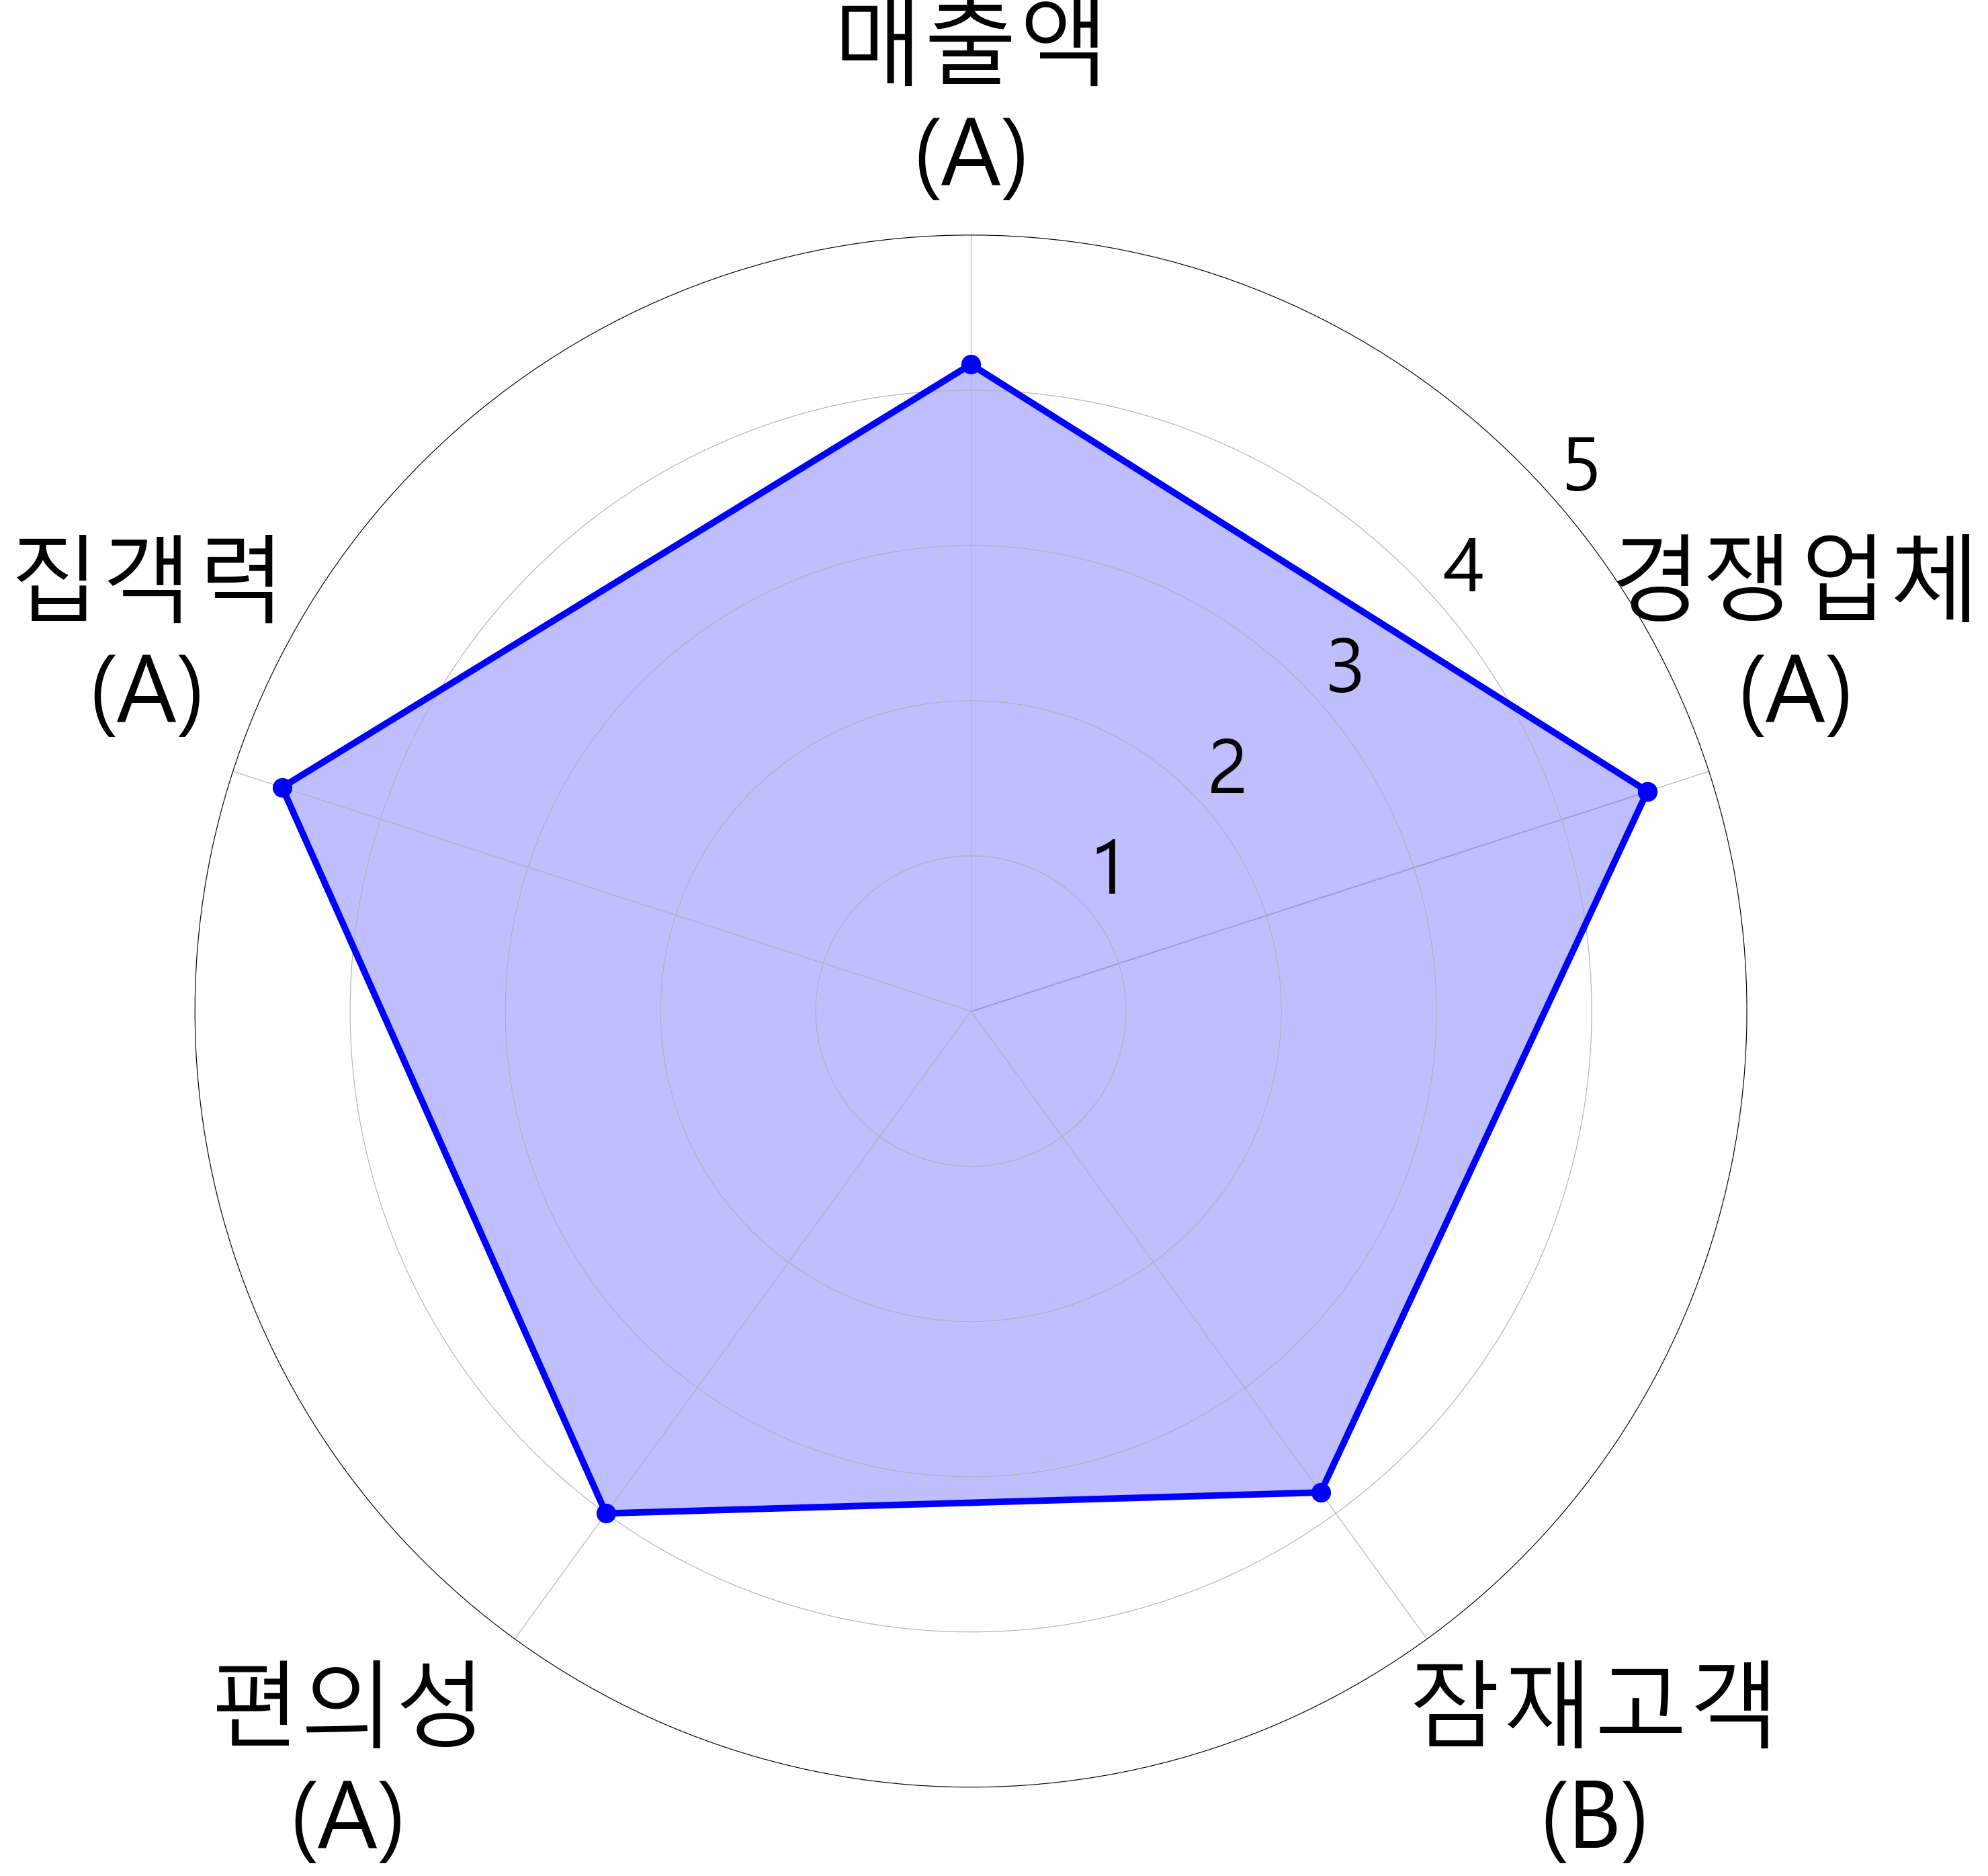

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl

### 차트 작성 부분
# 한글깨짐 해결
plt.rcParams["font.family"] = "Malgun Gothic"
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (32, 30)
# 마이너스 깨짐 해결
mpl.rcParams['axes.unicode_minus'] = False

# 각 변수의 이름과 값을 추출
categories = chart_df['variable'].tolist()
num_categories = len(categories)
values = chart_df['value'].tolist()
values += values[:1]

# 레이더 차트 그리기
fig, ax = plt.subplots(figsize=(32, 30), subplot_kw=dict(polar=True))
ax.fill_between(np.linspace(0, 2 * np.pi, num_categories + 1), values, color='blue', alpha=0.25)
ax.plot(np.linspace(0, 2 * np.pi, num_categories + 1), values, color='blue', linewidth=7, linestyle='solid', marker='o', markersize=20)

# x축 레이블과 등급 추가
ax.set_xticks(np.linspace(0, 2 * np.pi, num_categories, endpoint=False))

# X축 레이블 설정
xtick_labels = [f'{var}\n({grade})' for var, grade in zip(chart_df['variable'], chart_df['grade'])]
for i, label in enumerate(ax.set_xticklabels(xtick_labels, ha='center', va='bottom', rotation=0, fontsize=100)):
    if i == 0:  
        label.set_position((0, -0.1))
    elif i == 1:  
        label.set_position((0, -0.02))
    elif i == 2:  
        label.set_position((0, -0.1))
    elif i == 3:  
        label.set_position((0, -0.35))
    elif i == 4:  
        label.set_position((0, -0.35))
        
# y축 레이블 크기 크게 조절
yticks = np.arange(0, 6, 1)
yticklabels = [str(y) if y != 0 else '' for y in yticks]  # 0은 레이블을 숨기기 위해 빈 문자열로 설정
ax.set_yticks(yticks)
ax.set_yticklabels(yticklabels, fontsize=80)

# 차트 회전
ax.set_theta_offset(np.radians(18))

plt.show()

### 막대그래프

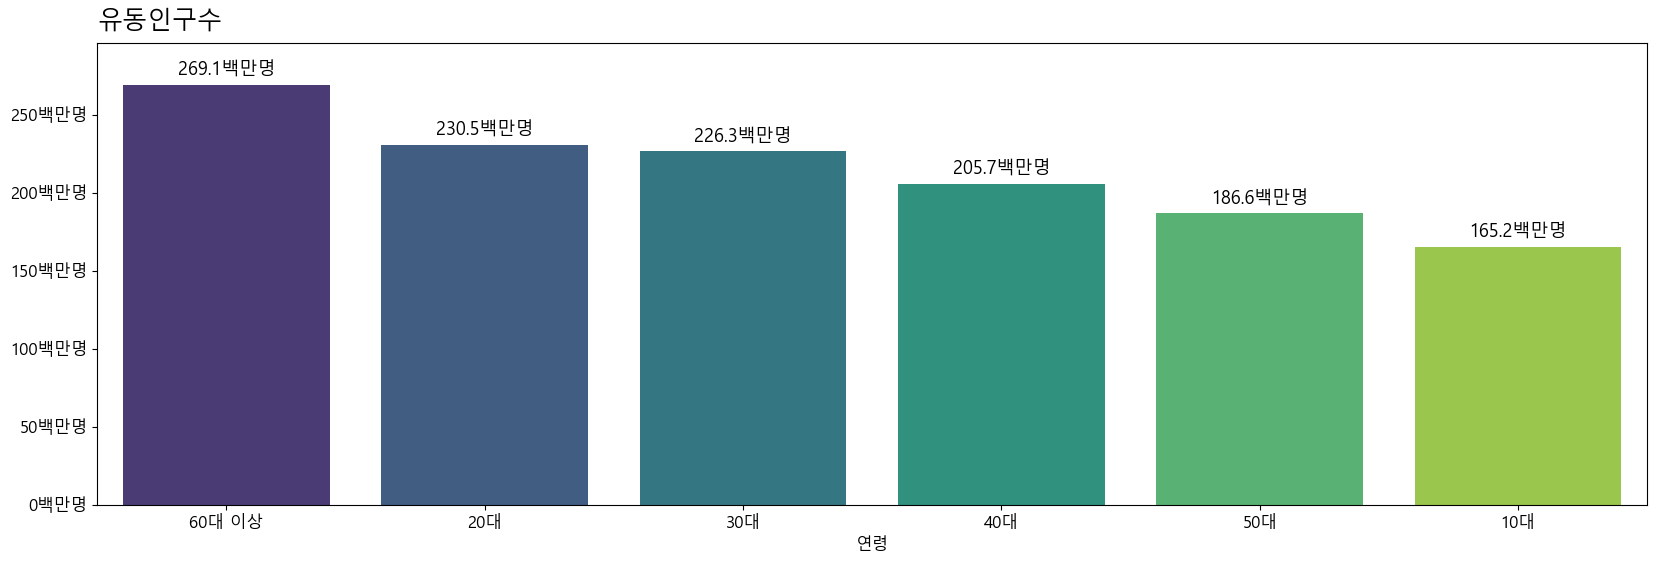

In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import matplotlib as mpl


import warnings

# 오류 경고 무시하기
warnings.filterwarnings(action='ignore')

# 한글깨짐 해결
plt.rcParams["font.family"] = "Malgun Gothic"
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (20, 6)
# 마이너스 깨짐 해결
mpl.rcParams['axes.unicode_minus'] = False

temp = melt_df[melt_df['서비스_업종_코드_명'] == '한식음식점']

### 데이터 가공
dataset = temp[['연령', '유동인구수', '매출금액']].groupby(by = '연령').sum()\
                                                 .reset_index()\
                                                 .sort_values(by = '유동인구수', ascending = False)
### 차트 작성
plt.figure(figsize=(20, 6))
sns.barplot(x='연령', y='유동인구수', hue='연령', data=dataset, palette='viridis')

# 막대 위에 값 라벨 표시
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{p.get_height()/1e6:.1f}백만명', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=13, color='black')

# y축 최댓값을 수동으로 설정하여 단위를 백만 명으로 변경
plt.ylim(0, max(dataset['유동인구수']) * 1.1)  # 적절한 범위로 설정 (예시로 최댓값의 1.5배로 설정)

# y축 라벨의 단위를 백만 명 단위로 변경
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:.0f}백만명'.format(x/1e6) for x in current_values])

# y축 라벨 삭제
plt.ylabel('')

plt.title('유동인구수', loc='left', pad=10, fontsize=18)

plt.show()